# Aim of the notebook

In this notebook we apply sinfonia to identify Spatially variable genes across xenium datasets

## IMPORTANT: Please use a conda environment that you can create using sinfonia.yml

# Import packages

In [1]:
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import sinfonia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scanpy as sc
import os

We next define the paths where files are stored

In [2]:
maindir='../../data/unprocessed_adata/'
output_dir='../../data/unprocessed_adata_nuclei/'
files=os.listdir(maindir)
files=['ms_brain_multisection1.h5ad', 'human_brain.h5ad','ms_brain_multisection2.h5ad',
 'ms_brain_multisection3.h5ad','realmouse_1.h5ad', 'realmouse_2.h5ad', 'realmouse_3.h5ad',
 'realmouse_4.h5ad', 'hbreast_ilc_addon_set2.h5ad', 'hbreast_ilc_addon_set4.h5ad', 'hbreast_ilc_entiresample_set3.h5ad',
 'healthy_lung.h5ad','human_alzheimers.h5ad', 'human_gbm.h5ad', 'human_spinal_chord_active.h5ad',
 'human_spinal_chord_inactive.h5ad', 'h_breast_1.h5ad','h_breast_2.h5ad','lung_cancer.h5ad',
 'ms_brain_fullcoronal.h5ad', 'ms_brain_partialcoronal.h5ad']

In [5]:
for f in files[:]:
    try:
        print(f)
        adata=sc.read(output_dir+f)
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])
        # Run SINFONIA
        adata = sinfonia.spatially_variable_genes(adata,n_top_genes=len(adata.var.index))
        moranI=adata.var.loc[:,['spatially_variable','moranI']]
        moranI['rank']=moranI['moranI'].rank()
        moranI.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__sinfonia_moranI.csv')
        gerayC=adata.var.loc[:,[ 'spatially_variable', 'gearyC']]
        gerayC['rank']=gerayC['gearyC'].rank()
        gerayC.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__sinfonia_gearyC.csv')
    except:
        print('not possible')

ms_brain_multisection1.h5ad
human_brain.h5ad
ms_brain_multisection2.h5ad
ms_brain_multisection3.h5ad
realmouse_1.h5ad
realmouse_2.h5ad
realmouse_3.h5ad
realmouse_4.h5ad
hbreast_ilc_addon_set2.h5ad
hbreast_ilc_addon_set4.h5ad
hbreast_ilc_entiresample_set3.h5ad
healthy_lung.h5ad
human_alzheimers.h5ad
human_gbm.h5ad
human_spinal_chord_active.h5ad
human_spinal_chord_inactive.h5ad
h_breast_1.h5ad
h_breast_2.h5ad
lung_cancer.h5ad
ms_brain_fullcoronal.h5ad
not possible
ms_brain_partialcoronal.h5ad
not possible


This is nice, but we just get the two variants. The final number of genes identified as SVGs are the interesection of both N genes for both morans I and gearyC

We need to implement this

In [ ]:
# run on 5000 cells

In [8]:
for f in files[:]:
    try:
        print(f)
        adata=sc.read(output_dir+f)
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])
        import random
        some=random.sample(range(0,adata.shape[0]),5000)
        adata=adata[some,:]
        # Run SINFONIA
        adata = sinfonia.spatially_variable_genes(adata,n_top_genes=len(adata.var.index))
        moranI=adata.var.loc[:,['spatially_variable','moranI']]
        moranI['rank']=moranI['moranI'].rank()
        moranI.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__sinfonia5000_moranI.csv')
        gerayC=adata.var.loc[:,[ 'spatially_variable', 'gearyC']]
        gerayC['rank']=gerayC['gearyC'].rank()
        gerayC.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__sinfonia5000_gearyC.csv')
    except:
        print('not possible')

ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


human_brain.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ms_brain_multisection2.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ms_brain_multisection3.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


realmouse_1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


realmouse_2.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


realmouse_3.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


realmouse_4.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


hbreast_ilc_addon_set2.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


hbreast_ilc_addon_set4.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


hbreast_ilc_entiresample_set3.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


healthy_lung.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


human_alzheimers.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


human_gbm.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


human_spinal_chord_active.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


human_spinal_chord_inactive.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


h_breast_1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


h_breast_2.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


lung_cancer.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ms_brain_fullcoronal.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


ms_brain_partialcoronal.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


# Time processing

In [4]:
import time
import random
f='ms_brain_multisection1.h5ad'
cells=[500,1000,5000,10000,50000,100000]
times=[]
for cel in cells:
    print(f)
    start_time = time.time()
    adata=sc.read(output_dir+f)
    some=random.sample(range(0,adata.shape[0]),int(cel))
    adata=adata[some,:]
    adata=adata[:,np.sum(adata.X,axis=0)>0]
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])
    # Run SINFONIA
    adata = sinfonia.spatially_variable_genes(adata,n_top_genes=len(adata.var.index))
    moranI=adata.var.loc[:,['spatially_variable','moranI']]
    moranI['rank']=moranI['moranI'].rank()
    gerayC=adata.var.loc[:,[ 'spatially_variable', 'gearyC']]
    gerayC['rank']=gerayC['gearyC'].rank()
    end_time = time.time()
    times.append(end_time-start_time)

ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


ms_brain_multisection1.h5ad


/home/sergio/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


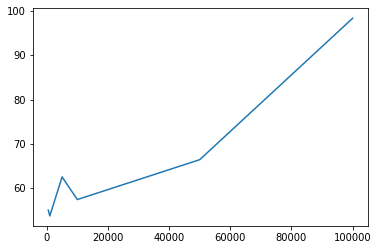

In [5]:
timesres=pd.DataFrame([cells,times],index=['cells','times_sinfonia']).transpose()
plt.plot(list(timesres['cells'].astype(int)),list(timesres['times_sinfonia'].astype(float)))
timesres.to_csv('../../figures/times_svf/sinfonia_times.csv')